# Recommender Feature Extraction

Now that we have provided the features for prediction system, we should look at the stocks and see how we can compare similarity between them.

In [14]:
import pandas as pd
import numpy as np
import sys, os
import sys
sys.path.insert(1, '..')
import recommender as rcmd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# retrieve a company profile
p = rcmd.contrib.fmp_api.profile.get_profile('AAPL')
p

,profile,symbol
beta,1.139593,AAPL
ceo,Timothy D. Cook,AAPL
changes,-0.37,AAPL
changesPercentage,(-0.16%),AAPL
companyName,Apple Inc.,AAPL
description,"Apple Inc is designs, manufactures and markets...",AAPL
exchange,Nasdaq Global Select,AAPL
image,https://financialmodelingprep.com/images-New-j...,AAPL
industry,Computer Hardware,AAPL
lastDiv,2.92,AAPL


Using the company profile, we should be able to create a one-hot embedding of sector and industry for the companies, allowing us to compare them. The description of the company might also help us to filter companies regarding the natural language queries proposed by the user (e.g. Entity recognition or simple comparision of embeddings).

Lets create a dataset from all company profiles that we know of (this combines the FMP data and the kaggle dataset):

In [7]:
from recommender.contrib import fmp_api as fmp

# retrieve all relevant symbols
stocks = fmp.profile.list_symbols()
cache = rcmd.stocks.Cache()
d1 = cache.list_data(type='stock')
d2 = cache.list_data(type='etf')

# combine symbols
symbols = list(d1.keys()) + list(d2.keys())
symbols = list(np.setdiff1d(symbols, stocks['symbol'].values)) + list(stocks['symbol'].values)

# TODO: use for generating the data (might take a while)
#df_profile = fmp.profile.list_profiles(symbols)
#df_profile.to_csv('../data/profiles.csv')

df_profile = pd.read_csv('../data/profiles.csv')

print(df_profile.shape)
df_profile.head()

(15525, 18)


,Unnamed: 0,beta,ceo,changes,changesPercentage,companyName,description,exchange,image,industry,lastDiv,mktCap,price,range,sector,symbol,volAvg,website
0,0,0.999041,NaN,-0.48,(-0.16%),SPDR S&P 500,The investment seeks to provide investment res...,NYSE Arca,https://financialmodelingprep.com/images-New-j...,NaN,5.066805,2.774458e+11,301.02,233.76-293.94,NaN,SPY,115036190,http://www.spdrs.com
1,1,1.108054,Brian L. Roberts,-0.03,(-0.06%),Comcast Corporation Class A Common Stock,Comcast Corp is a media and technology company...,Nasdaq Global Select,https://financialmodelingprep.com/images-New-j...,Entertainment,0.840000,2.123254e+11,46.67,30.43-41.33,Consumer Cyclical,CMCSA,28875593,https://corporate.comcast.com
2,2,0.962428,Steven J. Kean,-0.02,(-0.10%),Kinder Morgan Inc.,Kinder Morgan Inc is an energy infrastructure ...,New York Stock Exchange,https://financialmodelingprep.com/images-New-j...,Oil & Gas - Midstream,0.800000,4.582688e+10,20.68,14.6201-20.44,Energy,KMI,16636870,http://www.kindermorgan.com
3,3,0.795098,Brian M. Krzanich,-0.11,(-0.20%),Intel Corporation,Intel Corp is the world's largest chipmaker. I...,Nasdaq Global Select,https://financialmodelingprep.com/images-New-j...,Semiconductors,1.260000,2.424071e+11,51.57,42.36-57.5995,Technology,INTC,30437989,http://www.intel.com
4,4,1.850851,NaN,-0.01,(-0.01%),Micron Technology Inc.,Micron Technology Inc along with its subsidiar...,Nasdaq Global Select,https://financialmodelingprep.com/images-New-j...,Semiconductors,0.000000,6.125950e+10,49.85,28.39-64.66,Technology,MU,60797914,http://www.micron.com


First we will perform a general distribution analysis of the categorical values relevant to us:

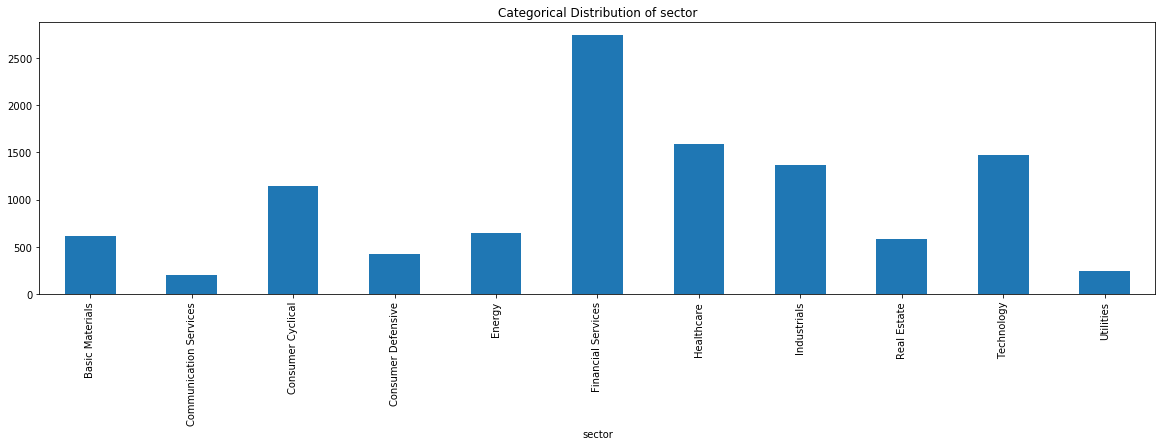

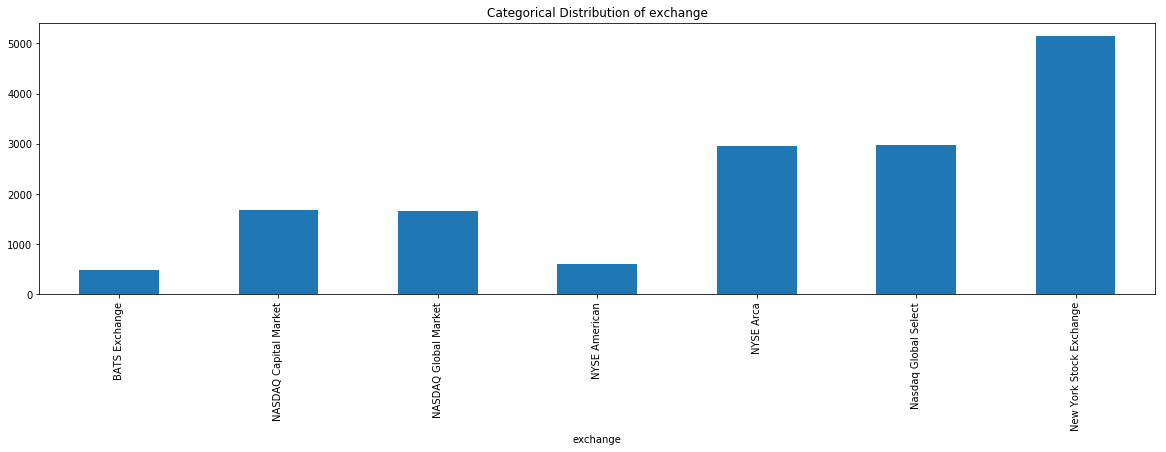

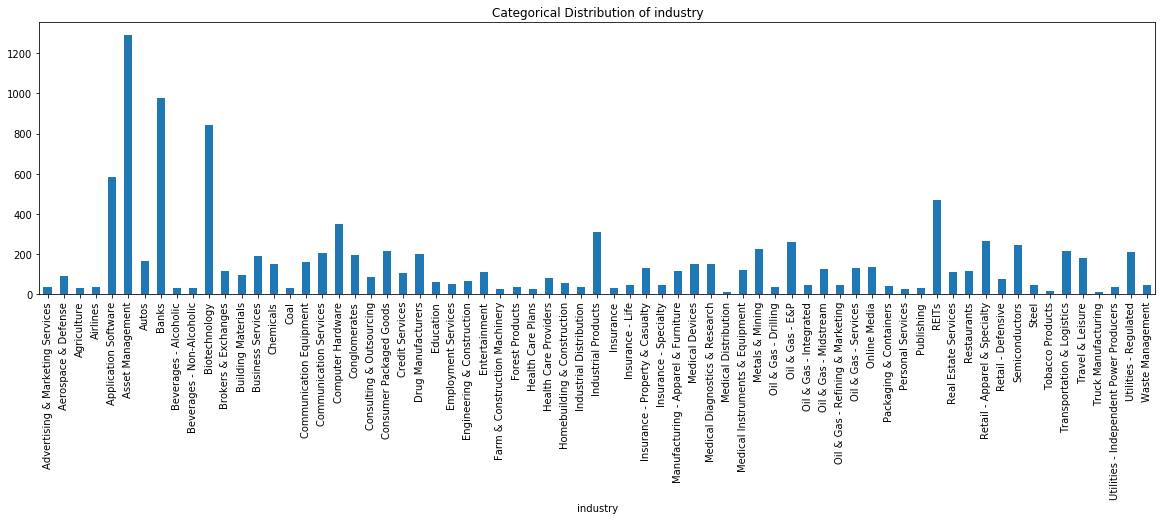

In [16]:
for col in ['sector', 'exchange', 'industry']:
    df_profile.groupby(col).count()['price'].plot.bar(figsize=(20, 5), title='Categorical Distribution of {}'.format(col));
    plt.show()

Now lets use the company description to extract additional features:

In [5]:
# TODO: NP extraction
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk import RegexpParser
from nltk import Tree

def extract_nouns(df, col_name):
    '''Retrieves the noun phrases from the given column
    
    Args:
        df (DataFrame): DataFrame to extract data from
        col_name (str): Name of the column to extract from
    
    Returns:
        DataFrame only with the extracted column
    '''
    pass

In [ ]:
# Set-Vectorize the noun phrases for each document

# perform t-SNE as dim-reduction

# visualize data

Now that we have a basic understanding of the data lets create the actual similarity data, that is relevant to the system:

In [17]:
# create dummy from all values

# calculate confusion matrix

# perform weighting on the data (e.g. lower weighting for stock exchange)

# calculate confusion matrix

TODO: discuss results